# CLUSTERING NEIGHBORHOODS/DISTRICTS IN BANGKOK

##  In this notebook, we will  explore, segment, and cluster the neighborhoods in the city of Bangkok for a tourism portal.

For the Bangkok neighborhood data, a Wikipedia page exists that has the information of districts but the data is not complete. We will connect to openstreetmap (nominatim) to geocode the undefined latlong.

After which we will fetch district wise neighbourhood data from Foursquare API and cluster the neighbourhoods to discover similarities and differences between the districts in Bangkok.

 BY SHUDH DATTA (@Shudh) *

### Section A - Scraping,cleaning & wrangling relevant data from Wikipedia

In [120]:
import pandas as pd # pandas
import numpy as np

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

!conda install -c conda-forge wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import seaborn as sns
%matplotlib inline 

print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-base-3.1.3      |   py36hef1b27d_0         6.6 MB
    wordcloud-1.6.0            |   py36h516909a_0         184 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following NEW packages will be INSTALLED:

    matplotlib-base: 3.1.3-py36hef1b27d_0            
    wordcloud:       1.6.0-py36h516909a_0 conda-forge


matplotlib-base-3.1. | 6.6 MB    | ##################################### | 100% 
wordcloud-1.6.0      | 184 KB    | ########################

Scraping wikipedia geolocation data of Bangkok neighbourhoods using pandas. Bangkok is subdivided into 50 districts (khet, เขต, pronounced [kʰèːt], also sometimes wrongly called amphoe as in the other provinces, derived from Pali khetta, cognate to Sanskrit kṣetra), which are further subdivided into 180 subdistricts (khwaeng, แขวง, pronounced [kʰwɛ̌ːŋ]), roughly equivalent to tambon in the other provinces. (Source Wiki)

In [121]:
link = "https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok"

tables = pd.read_html(link,header=0)[0]

tables

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,NaN,NaN
1,Bang Kapi,6,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.502500
5,Bang Khun Thian,21,บางขุนเทียน,165491,2,13.660833,100.435833
6,Bang Na,47,บางนา,95912,2,13.680081,100.591800
7,Bang Phlat,25,บางพลัด,99273,4,13.793889,100.505000
8,Bang Rak,4,บางรัก,45875,5,13.730833,100.524167
9,Bang Sue,29,บางซื่อ,132234,2,13.809722,100.537222


Next we will process the cells that have NaN values for latitude and longitude.

In [122]:
untagged_df = tables[tables.isnull().any(axis=1)]
untagged_df

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,NaN,NaN
19,Khan Na Yao,43,คันนายาว,88678,2,NaN,NaN
44,Thawi Watthana,48,ทวีวัฒนา,76351,2,NaN,NaN
46,Thung Khru,49,ทุ่งครุ,116473,2,NaN,NaN
47,Wang Thonglang,45,วังทองหลาง,114768,4,NaN,NaN


Let us try to get the lat long of the districts that has no geolocation in Wikipedia. The above table ^ . Before we hit the openstreet nominatim api. We will try if the api is returning data by sending the address as Bang Bon.

In [123]:
address = 'Bang Bon'

geolocator = Nominatim(user_agent="bangkok_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Bang Bon are 13.6665033, 100.4288593.


Ok as we were able to successfully fetch the geolocation values of Bang Bon. We will hit the nominatim api with all districts that are missing lat long in wikipedia.

In [124]:
from geopy.extra.rate_limiter import RateLimiter

geocode_df=untagged_df.drop(['Latitude', 'Longitude'], axis = 1)

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
geocode_df['location'] = geocode_df['District(Khet)'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geocode_df['point'] = geocode_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geocode_df[['Latitude', 'Longitude', 'altitude']] = pd.DataFrame(geocode_df['point'].tolist(), index=geocode_df.index)

geocode_df


,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),location,point,Latitude,Longitude,altitude
0,Bang Bon,50,บางบอน,105161,4,"(บางบอน, ถนนบางขุนเทียน, หมู่บ้านสุนทร 7, กรุง...","(13.6665033, 100.4288593, 0.0)",13.666503,100.428859,0.0
19,Khan Na Yao,43,คันนายาว,88678,2,"(ရေခံချောင်း, Myeik District, Tanintharyi Regi...","(12.2490756, 98.9507608, 0.0)",12.249076,98.950761,0.0
44,Thawi Watthana,48,ทวีวัฒนา,76351,2,"(ทวีวัฒนา, เขตทวีวัฒนา, กรุงเทพมหานคร, 10170, ...","(13.7726302, 100.3535049, 0.0)",13.772630,100.353505,0.0
46,Thung Khru,49,ทุ่งครุ,116473,2,"(เขตทุ่งครุ, กรุงเทพมหานคร, 10140, ประเทศไทย, ...","(13.625420250000001, 100.49378284953451, 0.0)",13.625420,100.493783,0.0
47,Wang Thonglang,45,วังทองหลาง,114768,4,"(เขตวังทองหลาง, กรุงเทพมหานคร, 10310, ประเทศไท...","(13.7778858, 100.61173764726523, 0.0)",13.777886,100.611738,0.0


We will now drop the unrequired columns from the geocoded dataframe

In [125]:
geocode_df = geocode_df.drop(['location', 'point','altitude'], axis = 1)
geocode_df

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,13.666503,100.428859
19,Khan Na Yao,43,คันนายาว,88678,2,12.249076,98.950761
44,Thawi Watthana,48,ทวีวัฒนา,76351,2,13.772630,100.353505
46,Thung Khru,49,ทุ่งครุ,116473,2,13.625420,100.493783
47,Wang Thonglang,45,วังทองหลาง,114768,4,13.777886,100.611738


Now that we have geocoded the districts that had no lat-long values. We will drop those from original dataframe

In [126]:
tables_tagged_df = tables.dropna()
tables_tagged_df

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
1,Bang Kapi,6,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.502500
5,Bang Khun Thian,21,บางขุนเทียน,165491,2,13.660833,100.435833
6,Bang Na,47,บางนา,95912,2,13.680081,100.591800
7,Bang Phlat,25,บางพลัด,99273,4,13.793889,100.505000
8,Bang Rak,4,บางรัก,45875,5,13.730833,100.524167
9,Bang Sue,29,บางซื่อ,132234,2,13.809722,100.537222
10,Bangkok Noi,20,บางกอกน้อย,117793,5,13.770867,100.467933


Now we will merge the dataframes to get the complete dataset of Bangkok districts geo-coded.

In [127]:
df_bangkok_tagged_full = pd.concat([geocode_df, tables_tagged_df], ignore_index=True)

df_bangkok_tagged_full

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,13.666503,100.428859
1,Khan Na Yao,43,คันนายาว,88678,2,12.249076,98.950761
2,Thawi Watthana,48,ทวีวัฒนา,76351,2,13.772630,100.353505
3,Thung Khru,49,ทุ่งครุ,116473,2,13.625420,100.493783
4,Wang Thonglang,45,วังทองหลาง,114768,4,13.777886,100.611738
5,Bang Kapi,6,บางกะปิ,148465,2,13.765833,100.647778
6,Bang Khae,40,บางแค,191781,4,13.696111,100.409444
7,Bang Khen,5,บางเขน,189539,2,13.873889,100.596389
8,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.502500
9,Bang Khun Thian,21,บางขุนเทียน,165491,2,13.660833,100.435833


### SECTION B 

### Now we are ready to virtually explore the districts of Bangkok using the Foursquare api 

Yes, you are right our exploration will be as good as the quality of data we receive!


We will take only one row out of the whole dataframe to see if foursquare setup is correct without overwhelming the API in loop.

In [128]:
# Just testing
neighborhood_latitude = df_bangkok_tagged_full.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_bangkok_tagged_full.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_bangkok_tagged_full.loc[0, 'District(Khet)'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bang Bon are 13.6665033, 100.4288593.


In [129]:
 # @hidden_cell

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

We will create the formatted url to the foursquare explore endpoint now

In [130]:

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 6000 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=4HRTD02I2SYW5KB4J0RSUEAWTRSV5TVXMFVA5ED0DWZNVA5J&client_secret=GVBEUUHHQDJGU44J4OOFK2K5MX4G2DDFYUEMUHNEUC0OOFJX&v=20180605&ll=13.6665033,100.4288593&radius=6000&limit=100'

Lets hit the endpoint for only one postal code

In [131]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e452073923935001beccb48'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bangkok',
  'headerFullLocation': 'Bangkok',
  'headerLocationGranularity': 'city',
  'totalResults': 212,
  'suggestedBounds': {'ne': {'lat': 13.720503354000055,
    'lng': 100.48432902084565},
   'sw': {'lat': 13.612503245999946, 'lng': 100.37338957915435}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '559b4bfc498eb645065670b6',
       'name': 'ขนมจีนเทวดา บีบเส้นสดๆ',
       'location': {'address': 'Rama II Rd',
        'crossStreet': 'in Susco',
        'lat': 13.659427894389015,
        'lng': 100.43369221781151,
        'labeledLatLngs': [{'label': 'display',
  

As we got the required data from Foursquare api. By examining the JSON we can extract the category of the venue.
The category of the venue is important because based on that our ML algorithm will learn about the nature of that neighbourhood.Let us abstract the logic of getting categories from data returned by creating a function to extract the category type from the foursquare data.

In [132]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

With the function above we parse the data into a dataframe.

In [133]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,ขนมจีนเทวดา บีบเส้นสดๆ,Noodle House,13.659428,100.433692
1,UNIQLO (ยูนิโคล่),Clothing Store,13.663285,100.439450
2,ไผ่ทองโภชนา,Thai Restaurant,13.662101,100.435264
3,Starbucks Reserve (สตาร์บัคส์ รีเสิร์ฟ),Coffee Shop,13.663825,100.437668
4,MK (เอ็มเค),Hotpot Restaurant,13.664320,100.438466
5,องุ่นสเต็ก & เย็นตาโฟ,Thai Restaurant,13.670467,100.419624
6,ข้าวมันไก่นายเอก (ข้าวมันไก่นายเอก บางบอน),Asian Restaurant,13.679264,100.435036
7,Tops Market (ท็อปส์ มาร์เก็ต),Supermarket,13.662781,100.437410
8,After You (อาฟเตอร์ ยู),Dessert Shop,13.663298,100.437247
9,Bar B Q Plaza (บาร์บีคิว พลาซ่า),BBQ Joint,13.664321,100.438516


So, now we have the venue names and categories around Latitude and longitude values of Bang Bon district. Some names are in Thai but thankfully for the algoritm the categories are in English.

In [134]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Ok now we are ready to  create a function to repeat the same process to all districts in Bangkok

In [135]:
def getNearbyVenues(names, latitudes, longitudes, radius=6000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now is the time to hit the foursquare end point with all neighbourhoods in Bangkok

In [136]:
bangkok_venues = getNearbyVenues(names=df_bangkok_tagged_full['District(Khet)'],
                                   latitudes=df_bangkok_tagged_full['Latitude'],
                                   longitudes=df_bangkok_tagged_full['Longitude']
                                )


Bang Bon
Khan Na Yao
Thawi Watthana
Thung Khru
Wang Thonglang
Bang Kapi
Bang Khae
Bang Khen
Bang Kho Laem
Bang Khun Thian
Bang Na
Bang Phlat
Bang Rak
Bang Sue
Bangkok Noi
Bangkok Yai
Bueng Kum
Chatuchak
Chom Thong
Din Daeng
Don Mueang
Dusit
Huai Khwang
Khlong Sam Wa
Khlong San
Khlong Toei
Lak Si
Lat Krabang
Lat Phrao
Min Buri
Nong Chok
Nong Khaem
Pathum Wan
Phasi Charoen
Phaya Thai
Phra Khanong
Phra Nakhon
Pom Prap Sattru Phai
Prawet
Rat Burana
Ratchathewi
Sai Mai
Samphanthawong
Saphan Sung
Sathon
Suan Luang
Taling Chan
Thon Buri
Watthana
Yan Nawa


Lets have a glimpse of what we got back in the dataframe from Foursquare for all Bangkok districts

In [137]:
print(bangkok_venues.shape)
bangkok_venues.head()

(4809, 7)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.666503,100.428859,ขนมจีนเทวดา บีบเส้นสดๆ,13.659428,100.433692,Noodle House
1,Bang Bon,13.666503,100.428859,UNIQLO (ยูนิโคล่),13.663285,100.439450,Clothing Store
2,Bang Bon,13.666503,100.428859,ไผ่ทองโภชนา,13.662101,100.435264,Thai Restaurant
3,Bang Bon,13.666503,100.428859,Starbucks Reserve (สตาร์บัคส์ รีเสิร์ฟ),13.663825,100.437668,Coffee Shop
4,Bang Bon,13.666503,100.428859,MK (เอ็มเค),13.664320,100.438466,Hotpot Restaurant



Let's check how many venues were returned for each neighborhood

In [138]:
bangkok_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bang Bon,100,100,100,100,100,100
Bang Kapi,100,100,100,100,100,100
Bang Khae,100,100,100,100,100,100
Bang Khen,100,100,100,100,100,100
Bang Kho Laem,100,100,100,100,100,100
Bang Khun Thian,100,100,100,100,100,100
Bang Na,100,100,100,100,100,100
Bang Phlat,100,100,100,100,100,100
Bang Rak,100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues in Bangkok

### Now, that we have the data it is time to perform some exploratory data analysis to draw some inference from the data

In [139]:
print('There are {} uniques categories.'.format(len(bangkok_venues['Venue Category'].unique())))

There are 209 uniques categories.


In [140]:
bangkok_venue_counts = bangkok_venues['Venue Category'].value_counts().to_frame()

bangkok_venue_counts.rename(columns={'Venue Category': 'value_counts'}, inplace=True)
bangkok_venue_counts.index.name = 'test'

bangkok_venue_counts

,value_counts
test,
Coffee Shop,401
Thai Restaurant,382
Noodle House,368
Hotel,220
Café,141
Asian Restaurant,131
Dessert Shop,125
Shopping Mall,96
Supermarket,95


In [141]:
#bangkok_venue_counts.plot(x ='categories', y='value_counts', kind = 'bar')
#bangkok_venue_counts.head()

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


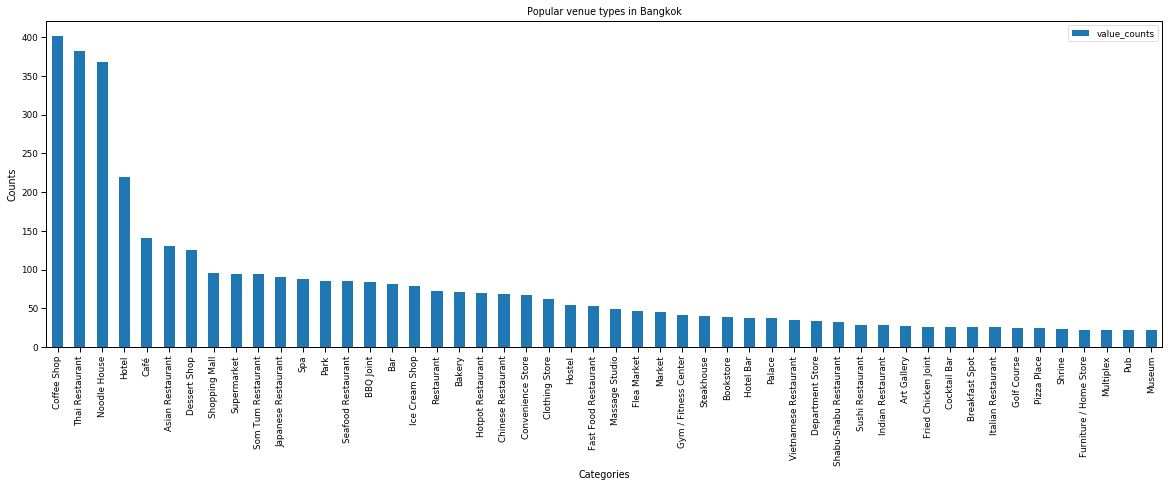

In [142]:
#bangkok_venue_counts.plot(x ='categories', y='value_counts', kind = 'bar')

bangkok_venue_counts_df_10 = bangkok_venue_counts[bangkok_venue_counts['value_counts'] > 20]
bangkok_venue_counts_df_10.head()

bangkok_venue_counts_df_10.plot(kind='bar', figsize=(20, 6))
plt.rcParams.update({'font.size': 22})
plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Counts') # add y-label to the plot
plt.title('Popular venue types in Bangkok') # add title to the plot

plt.show()

#list(bangkok_venue_counts.columns)

#bangkok_venue_counts.head()


It looks like Bangkok is a city of Coffee Shops, Hotels, Restaurants & Spas.


Let us progress with one hot encoding

In [143]:
# one hot encoding
bangkok_onehot = pd.get_dummies(bangkok_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bangkok_onehot['Neighbourhood'] = bangkok_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [bangkok_onehot.columns[-1]] + list(bangkok_onehot.columns[:-1])
bangkok_onehot = bangkok_onehot[fixed_columns]

bangkok_onehot.head()

,Neighbourhood,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Veterinarian,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo
0,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lets get the dataframe size

In [144]:
bangkok_onehot.shape

(4809, 210)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [145]:
bangkok_grouped = bangkok_onehot.groupby('Neighbourhood').mean().reset_index()
bangkok_grouped

,Neighbourhood,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Veterinarian,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo
0,Bang Bon,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.040000,0.00,...,0.00,0.01,0.000000,0.000000,0.00,0.00,0.01,0.00,0.00,0.00
1,Bang Kapi,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.00,0.01,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00
2,Bang Khae,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.020000,0.00,...,0.00,0.01,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00
3,Bang Khen,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.040000,0.00,...,0.00,0.02,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00
4,Bang Kho Laem,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.030000,0.00,...,0.00,0.00,0.000000,0.000000,0.01,0.01,0.00,0.00,0.00,0.00
5,Bang Khun Thian,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.040000,0.00,...,0.00,0.01,0.000000,0.000000,0.00,0.00,0.01,0.00,0.00,0.00
6,Bang Na,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.040000,0.00,...,0.00,0.02,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00
7,Bang Phlat,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.030000,0.00,...,0.00,0.01,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00
8,Bang Rak,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.020000,0.00,...,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00
9,Bang Sue,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.040000,0.00,...,0.00,0.00,0.000000,0.000000,0.01,0.00,0.00,0.00,0.00,0.00


Lets find the new size

In [146]:
bangkok_grouped.shape

(49, 210)

In [147]:
bangkok_high_frq_cat = bangkok_grouped[['Neighbourhood','Hotel','Coffee Shop','Hostel','Shopping Mall','Spa','Park','Bar']]

bangkok_high_frq_cat

,Neighbourhood,Hotel,Coffee Shop,Hostel,Shopping Mall,Spa,Park,Bar
0,Bang Bon,0.00,0.110000,0.00,0.020000,0.00,0.010000,0.010000
1,Bang Kapi,0.01,0.130000,0.00,0.010000,0.00,0.020000,0.010000
2,Bang Khae,0.00,0.130000,0.00,0.040000,0.00,0.010000,0.000000
3,Bang Khen,0.00,0.130000,0.00,0.010000,0.00,0.010000,0.010000
4,Bang Kho Laem,0.10,0.030000,0.01,0.010000,0.05,0.020000,0.020000
5,Bang Khun Thian,0.00,0.110000,0.00,0.020000,0.00,0.010000,0.010000
6,Bang Na,0.01,0.090000,0.00,0.010000,0.03,0.010000,0.030000
7,Bang Phlat,0.04,0.050000,0.04,0.000000,0.01,0.030000,0.020000
8,Bang Rak,0.18,0.070000,0.01,0.040000,0.04,0.010000,0.030000
9,Bang Sue,0.01,0.070000,0.02,0.020000,0.01,0.030000,0.050000


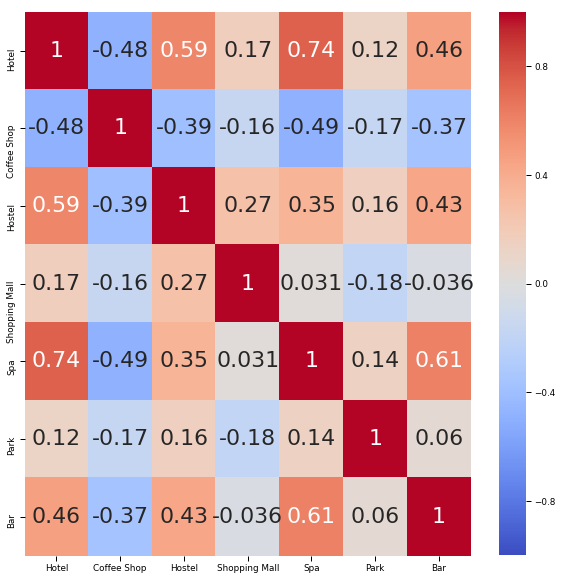

In [148]:
corr = bangkok_high_frq_cat.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the above correlation heatmap we can see that Hotel and Spa are strongly correlated as the linear relationship is quite strong ( ~ 0.74). Also, the hotels and hostels could be found together in certain neighbourhoods. However, it does look like you might have to put some effort to get good coffee in those neighbourhoods (negatively correlated).

Also, note that Spa and Bar are positively correlated though not as strong as relationship between Hotels and Spas that we found earlier in certain neighbourhoods.

So, one can hop in to the spas and bars if they stay in neighbourhoods with maximum frequency of hostels and hotels.

Let's print each neighborhood (district) in Bangkok along with the top 5 most common venues. This will give us some feel for the nature of that district!


In [149]:
num_top_venues = 5

for hood in bangkok_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = bangkok_grouped[bangkok_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bang Bon----
              venue  freq
0      Noodle House  0.12
1       Coffee Shop  0.11
2   Thai Restaurant  0.10
3  Asian Restaurant  0.04
4         BBQ Joint  0.04


----Bang Kapi----
             venue  freq
0     Noodle House  0.20
1      Coffee Shop  0.13
2  Thai Restaurant  0.11
3             Café  0.04
4     Dessert Shop  0.04


----Bang Khae----
                  venue  freq
0           Coffee Shop  0.13
1       Thai Restaurant  0.10
2             BBQ Joint  0.07
3          Noodle House  0.07
4  Fast Food Restaurant  0.05


----Bang Khen----
             venue  freq
0      Coffee Shop  0.13
1     Noodle House  0.10
2  Thai Restaurant  0.07
3      Supermarket  0.05
4      Golf Course  0.04


----Bang Kho Laem----
                venue  freq
0               Hotel  0.10
1     Thai Restaurant  0.08
2        Noodle House  0.07
3                 Spa  0.05
4  Seafood Restaurant  0.04


----Bang Khun Thian----
              venue  freq
0       Coffee Shop  0.11
1      Noodle Hou

First, let's write a function to sort the venues in descending order.

In [150]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [151]:
#import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = bangkok_grouped['Neighbourhood']

for ind in np.arange(bangkok_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangkok_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,Noodle House,Coffee Shop,Thai Restaurant,Asian Restaurant,BBQ Joint,Ice Cream Shop,Fast Food Restaurant,Café,Soup Place,Dessert Shop
1,Bang Kapi,Noodle House,Coffee Shop,Thai Restaurant,Dessert Shop,Café,Pub,Fast Food Restaurant,Supermarket,Soccer Field,Park
2,Bang Khae,Coffee Shop,Thai Restaurant,BBQ Joint,Noodle House,Fast Food Restaurant,Shopping Mall,Ice Cream Shop,Clothing Store,Japanese Restaurant,Gym / Fitness Center
3,Bang Khen,Coffee Shop,Noodle House,Thai Restaurant,Supermarket,Asian Restaurant,Som Tum Restaurant,Golf Course,Gun Range,Café,Chinese Restaurant
4,Bang Kho Laem,Hotel,Thai Restaurant,Noodle House,Spa,Seafood Restaurant,Café,Hotel Bar,Asian Restaurant,Chinese Restaurant,Bistro


### Now armed with the above dataset finally we are ready to train a Machine Learning Model 

We will apply the k-means algorithm which is an unsupervised clustering algorithm. It takes a bunch of unlabeled points and tries to group them into “k” number of clusters.

Run k-means to cluster the neighborhood into 4 clusters.

In [152]:
# set number of clusters
kclusters = 4

bangkok_grouped_clustering = bangkok_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangkok_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 1, 2, 2, 3, 1, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [153]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bangkok_merged = df_bangkok_tagged_full

# merge bangkok_grouped with bangkok_data to add latitude/longitude for each neighborhood
bangkok_merged = bangkok_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='District(Khet)')

bangkok_merged.head() # check the last columns!



,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,50,บางบอน,105161,4,13.666503,100.428859,2.0,Noodle House,Coffee Shop,Thai Restaurant,Asian Restaurant,BBQ Joint,Ice Cream Shop,Fast Food Restaurant,Café,Soup Place,Dessert Shop
1,Khan Na Yao,43,คันนายาว,88678,2,12.249076,98.950761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thawi Watthana,48,ทวีวัฒนา,76351,2,13.772630,100.353505,0.0,Thai Restaurant,Noodle House,Coffee Shop,Café,Som Tum Restaurant,Convenience Store,Park,Hotpot Restaurant,Flea Market,Supermarket
3,Thung Khru,49,ทุ่งครุ,116473,2,13.625420,100.493783,0.0,Thai Restaurant,Noodle House,Convenience Store,Seafood Restaurant,Coffee Shop,Café,BBQ Joint,Chinese Restaurant,Som Tum Restaurant,Food Court
4,Wang Thonglang,45,วังทองหลาง,114768,4,13.777886,100.611738,2.0,Noodle House,Coffee Shop,Thai Restaurant,Shopping Mall,Chinese Restaurant,Hotel,Café,Supermarket,Dessert Shop,Som Tum Restaurant


Let us remove the null values

And finally let us visualize the clusters created by ML for Bangkok

In [154]:
cluster_nan_df = bangkok_merged[bangkok_merged.isnull().any(axis=1)]
cluster_nan_df

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Khan Na Yao,43,คันนายาว,88678,2,12.249076,98.950761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
bangkok_merged = bangkok_merged.dropna()
bangkok_merged

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,50,บางบอน,105161,4,13.666503,100.428859,2.0,Noodle House,Coffee Shop,Thai Restaurant,Asian Restaurant,BBQ Joint,Ice Cream Shop,Fast Food Restaurant,Café,Soup Place,Dessert Shop
2,Thawi Watthana,48,ทวีวัฒนา,76351,2,13.772630,100.353505,0.0,Thai Restaurant,Noodle House,Coffee Shop,Café,Som Tum Restaurant,Convenience Store,Park,Hotpot Restaurant,Flea Market,Supermarket
3,Thung Khru,49,ทุ่งครุ,116473,2,13.625420,100.493783,0.0,Thai Restaurant,Noodle House,Convenience Store,Seafood Restaurant,Coffee Shop,Café,BBQ Joint,Chinese Restaurant,Som Tum Restaurant,Food Court
4,Wang Thonglang,45,วังทองหลาง,114768,4,13.777886,100.611738,2.0,Noodle House,Coffee Shop,Thai Restaurant,Shopping Mall,Chinese Restaurant,Hotel,Café,Supermarket,Dessert Shop,Som Tum Restaurant
5,Bang Kapi,6,บางกะปิ,148465,2,13.765833,100.647778,2.0,Noodle House,Coffee Shop,Thai Restaurant,Dessert Shop,Café,Pub,Fast Food Restaurant,Supermarket,Soccer Field,Park
6,Bang Khae,40,บางแค,191781,4,13.696111,100.409444,2.0,Coffee Shop,Thai Restaurant,BBQ Joint,Noodle House,Fast Food Restaurant,Shopping Mall,Ice Cream Shop,Clothing Store,Japanese Restaurant,Gym / Fitness Center
7,Bang Khen,5,บางเขน,189539,2,13.873889,100.596389,2.0,Coffee Shop,Noodle House,Thai Restaurant,Supermarket,Asian Restaurant,Som Tum Restaurant,Golf Course,Gun Range,Café,Chinese Restaurant
8,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.502500,1.0,Hotel,Thai Restaurant,Noodle House,Spa,Seafood Restaurant,Café,Hotel Bar,Asian Restaurant,Chinese Restaurant,Bistro
9,Bang Khun Thian,21,บางขุนเทียน,165491,2,13.660833,100.435833,2.0,Noodle House,Coffee Shop,Thai Restaurant,Asian Restaurant,BBQ Joint,Seafood Restaurant,Ice Cream Shop,Fast Food Restaurant,Soup Place,Café
10,Bang Na,47,บางนา,95912,2,13.680081,100.591800,2.0,Noodle House,Coffee Shop,BBQ Joint,Café,Thai Restaurant,Asian Restaurant,Spa,Bar,Ice Cream Shop,Japanese Restaurant


In [156]:
# create map
latitude = 13.666503
longitude = 100.428859
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bangkok_merged['Latitude'], bangkok_merged['Longitude'], bangkok_merged['District(Khet)'], bangkok_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analyzing each Bangkok cluster

In [157]:
bangkok_merged.loc[bangkok_merged['Cluster Labels'] == 0, bangkok_merged.columns[[0] + list(range(5, bangkok_merged.shape[1]))]]

,District(Khet),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Thawi Watthana,13.772630,100.353505,0.0,Thai Restaurant,Noodle House,Coffee Shop,Café,Som Tum Restaurant,Convenience Store,Park,Hotpot Restaurant,Flea Market,Supermarket
3,Thung Khru,13.625420,100.493783,0.0,Thai Restaurant,Noodle House,Convenience Store,Seafood Restaurant,Coffee Shop,Café,BBQ Joint,Chinese Restaurant,Som Tum Restaurant,Food Court
23,Khlong Sam Wa,13.859722,100.704167,0.0,Thai Restaurant,Coffee Shop,Asian Restaurant,Japanese Restaurant,Noodle House,Som Tum Restaurant,Convenience Store,Dessert Shop,Bakery,Seafood Restaurant
29,Min Buri,13.813889,100.748056,0.0,Thai Restaurant,Noodle House,Coffee Shop,Convenience Store,Chinese Restaurant,Furniture / Home Store,Café,Asian Restaurant,Fast Food Restaurant,Restaurant
30,Nong Chok,13.855556,100.862500,0.0,Convenience Store,Café,Thai Restaurant,Shopping Mall,Asian Restaurant,Halal Restaurant,Coffee Shop,Bistro,Golf Course,Big Box Store
31,Nong Khaem,13.704722,100.348889,0.0,Thai Restaurant,Convenience Store,Noodle House,Asian Restaurant,Som Tum Restaurant,Coffee Shop,Fast Food Restaurant,Flea Market,Hotpot Restaurant,Restaurant
38,Prawet,13.716944,100.694444,0.0,Thai Restaurant,Noodle House,Coffee Shop,Convenience Store,Seafood Restaurant,Café,Hotpot Restaurant,Vietnamese Restaurant,Restaurant,Japanese Restaurant


    District(Khet)
2   Thawi Watthana
3       Thung Khru
23   Khlong Sam Wa
29        Min Buri
30       Nong Chok
31      Nong Khaem
38          Prawet


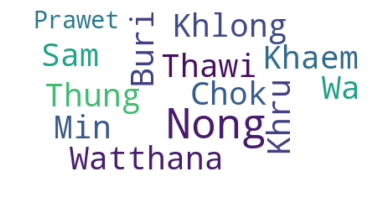

In [170]:
cluster0_df = bangkok_merged.loc[bangkok_merged['Cluster Labels'] == 0, bangkok_merged.columns[[0] + list(range(5, bangkok_merged.shape[1]))]]

print(cluster0_df[['District(Khet)']])

wordcloud0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(cluster0_df['District(Khet)']))
plt.figure()
plt.imshow(wordcloud0, interpolation="bilinear")
plt.axis("off")
plt.show()


## CLUSTER 0 [ The outskirts]

This cluster identified by the machine is far away from the city center. There are no hotels (or negligible) here. Thai restaurants and noodle houses cater to the local palette are abundant with depertment stores.

In [158]:
bangkok_merged.loc[bangkok_merged['Cluster Labels'] == 1, bangkok_merged.columns[[0] + list(range(5, bangkok_merged.shape[1]))]]

,District(Khet),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Bang Kho Laem,13.693333,100.502500,1.0,Hotel,Thai Restaurant,Noodle House,Spa,Seafood Restaurant,Café,Hotel Bar,Asian Restaurant,Chinese Restaurant,Bistro
12,Bang Rak,13.730833,100.524167,1.0,Hotel,Coffee Shop,Spa,Shopping Mall,Dessert Shop,Noodle House,Clothing Store,Bar,Gym / Fitness Center,Fried Chicken Joint
15,Bangkok Yai,13.722778,100.476389,1.0,Thai Restaurant,Hotel,Coffee Shop,Noodle House,Seafood Restaurant,Palace,Asian Restaurant,Bar,Spa,Dessert Shop
19,Din Daeng,13.769722,100.552778,1.0,Hotel,Coffee Shop,Hostel,Dessert Shop,Department Store,Hotel Bar,Japanese Restaurant,Spa,Clothing Store,Bakery
24,Khlong San,13.730278,100.509722,1.0,Hotel,Coffee Shop,Thai Restaurant,Palace,Asian Restaurant,Spa,Dessert Shop,Hostel,Bar,Shopping Mall
32,Pathum Wan,13.744942,100.522200,1.0,Hotel,Coffee Shop,Shopping Mall,Asian Restaurant,Dessert Shop,Spa,Hostel,Department Store,Clothing Store,Bar
39,Rat Burana,13.682222,100.505556,1.0,Noodle House,Hotel,Coffee Shop,Thai Restaurant,Som Tum Restaurant,Seafood Restaurant,Spa,Bistro,Asian Restaurant,Park
40,Ratchathewi,13.758889,100.534444,1.0,Hotel,Hostel,Noodle House,Coffee Shop,Dessert Shop,Department Store,Bookstore,Cocktail Bar,Shopping Mall,Restaurant
42,Samphanthawong,13.731389,100.514167,1.0,Hotel,Coffee Shop,Thai Restaurant,Spa,Dessert Shop,Asian Restaurant,Shopping Mall,Bar,Noodle House,Shrine
44,Sathon,13.708056,100.526389,1.0,Hotel,Noodle House,Spa,Coffee Shop,Thai Restaurant,Bar,Breakfast Spot,Seafood Restaurant,Restaurant,Som Tum Restaurant


    District(Khet)
8    Bang Kho Laem
12        Bang Rak
15     Bangkok Yai
19       Din Daeng
24      Khlong San
32      Pathum Wan
39      Rat Burana
40     Ratchathewi
42  Samphanthawong
44          Sathon
47       Thon Buri
49        Yan Nawa


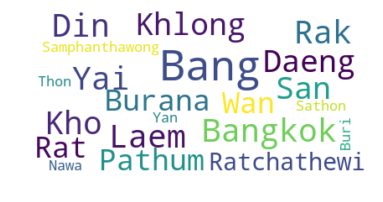

In [166]:
cluster1_df = bangkok_merged.loc[bangkok_merged['Cluster Labels'] == 1, bangkok_merged.columns[[0] + list(range(5, bangkok_merged.shape[1]))]]

print(cluster1_df[['District(Khet)']])

wordcloud1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(cluster1_df['District(Khet)']))
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()


## CLUSTER 1.0 [ THE BACKPACKERS CLUSTER ]

This cluster is dotted with hostels and hotels also noodle houses, thai restaurants jostle for space with spas. It appears to be a cluster where one should visit atleast once even if they are not staying. Probably one of the central tourist destination. Due to the presence of hostels this could be ideal for young backpackers.

In [159]:
bangkok_merged.loc[bangkok_merged['Cluster Labels'] == 2, bangkok_merged.columns[[0] + list(range(5, bangkok_merged.shape[1]))]]

,District(Khet),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bang Bon,13.666503,100.428859,2.0,Noodle House,Coffee Shop,Thai Restaurant,Asian Restaurant,BBQ Joint,Ice Cream Shop,Fast Food Restaurant,Café,Soup Place,Dessert Shop
4,Wang Thonglang,13.777886,100.611738,2.0,Noodle House,Coffee Shop,Thai Restaurant,Shopping Mall,Chinese Restaurant,Hotel,Café,Supermarket,Dessert Shop,Som Tum Restaurant
5,Bang Kapi,13.765833,100.647778,2.0,Noodle House,Coffee Shop,Thai Restaurant,Dessert Shop,Café,Pub,Fast Food Restaurant,Supermarket,Soccer Field,Park
6,Bang Khae,13.696111,100.409444,2.0,Coffee Shop,Thai Restaurant,BBQ Joint,Noodle House,Fast Food Restaurant,Shopping Mall,Ice Cream Shop,Clothing Store,Japanese Restaurant,Gym / Fitness Center
7,Bang Khen,13.873889,100.596389,2.0,Coffee Shop,Noodle House,Thai Restaurant,Supermarket,Asian Restaurant,Som Tum Restaurant,Golf Course,Gun Range,Café,Chinese Restaurant
9,Bang Khun Thian,13.660833,100.435833,2.0,Noodle House,Coffee Shop,Thai Restaurant,Asian Restaurant,BBQ Joint,Seafood Restaurant,Ice Cream Shop,Fast Food Restaurant,Soup Place,Café
10,Bang Na,13.680081,100.591800,2.0,Noodle House,Coffee Shop,BBQ Joint,Café,Thai Restaurant,Asian Restaurant,Spa,Bar,Ice Cream Shop,Japanese Restaurant
13,Bang Sue,13.809722,100.537222,2.0,Thai Restaurant,Noodle House,Coffee Shop,Bar,Asian Restaurant,BBQ Joint,Japanese Restaurant,Restaurant,Som Tum Restaurant,Park
16,Bueng Kum,13.785278,100.669167,2.0,Coffee Shop,Noodle House,Thai Restaurant,Restaurant,Supermarket,Asian Restaurant,Fast Food Restaurant,Dessert Shop,Flea Market,Seafood Restaurant
17,Chatuchak,13.828611,100.559722,2.0,Thai Restaurant,Coffee Shop,Noodle House,Café,Bar,Som Tum Restaurant,Flea Market,Pub,Chinese Restaurant,Asian Restaurant


     District(Khet)
0          Bang Bon
4    Wang Thonglang
5         Bang Kapi
6         Bang Khae
7         Bang Khen
9   Bang Khun Thian
10          Bang Na
13         Bang Sue
16        Bueng Kum
17        Chatuchak
18       Chom Thong
20       Don Mueang
26           Lak Si
27      Lat Krabang
28        Lat Phrao
33    Phasi Charoen
41          Sai Mai
43      Saphan Sung
45       Suan Luang
46      Taling Chan


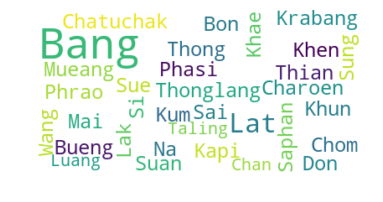

In [165]:
cluster2_df = bangkok_merged.loc[bangkok_merged['Cluster Labels'] == 2, bangkok_merged.columns[[0] + list(range(5, bangkok_merged.shape[1]))]]

print(cluster2_df[['District(Khet)']])

wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(cluster2_df['District(Khet)']))
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()


## CLUSTER 2 ( The Resident Cluster)

Lack of hotels/hostels hustle and bustle are the characteristics of this cluster. If you are an expat and plan to work in Bangkok you should considering renting a place in this cluster. Also, from the visualization map one can stay nearer to airport and away from city center here. When you dont want to cook the friendly neighbourhood noodle houses will welcome you.

In [160]:
bangkok_merged.loc[bangkok_merged['Cluster Labels'] == 3, bangkok_merged.columns[[0] + list(range(5, bangkok_merged.shape[1]))]]

,District(Khet),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Bang Phlat,13.793889,100.505000,3.0,Thai Restaurant,Noodle House,Coffee Shop,Hostel,Hotel,Som Tum Restaurant,Palace,BBQ Joint,Museum,Bakery
14,Bangkok Noi,13.770867,100.467933,3.0,Coffee Shop,Thai Restaurant,Café,Noodle House,Hotel,Palace,Bakery,Dessert Shop,Massage Studio,Som Tum Restaurant
21,Dusit,13.776944,100.520556,3.0,Coffee Shop,Hotel,Asian Restaurant,Dessert Shop,Hostel,Thai Restaurant,Shopping Mall,Bar,Bookstore,Clothing Store
22,Huai Khwang,13.776667,100.579444,3.0,Coffee Shop,Supermarket,Hotel,Hostel,Thai Restaurant,Noodle House,Park,Pizza Place,Asian Restaurant,Steakhouse
25,Khlong Toei,13.708056,100.583889,3.0,Japanese Restaurant,Café,Coffee Shop,Noodle House,Thai Restaurant,Spa,Hotel,Supermarket,Shopping Mall,Bar
34,Phaya Thai,13.780000,100.542778,3.0,Hotel,Coffee Shop,Dessert Shop,Supermarket,Park,Noodle House,Shopping Mall,Department Store,Hostel,Clothing Store
35,Phra Khanong,13.702222,100.601667,3.0,Café,Noodle House,Coffee Shop,Japanese Restaurant,Spa,Thai Restaurant,Bar,Hotel,BBQ Joint,Ice Cream Shop
36,Phra Nakhon,13.764444,100.499167,3.0,Dessert Shop,Hotel,Coffee Shop,Thai Restaurant,Palace,Hostel,Shopping Mall,Ice Cream Shop,Asian Restaurant,Japanese Restaurant
37,Pom Prap Sattru Phai,13.758056,100.513056,3.0,Coffee Shop,Thai Restaurant,Palace,Dessert Shop,Hotel,Asian Restaurant,Clothing Store,Bookstore,Shopping Mall,Massage Studio
48,Watthana,13.742222,100.585833,3.0,Japanese Restaurant,Thai Restaurant,Coffee Shop,Hotel,Noodle House,Café,Shopping Mall,Supermarket,Cocktail Bar,Dessert Shop


          District(Khet)
11            Bang Phlat
14           Bangkok Noi
21                 Dusit
22           Huai Khwang
25           Khlong Toei
34            Phaya Thai
35          Phra Khanong
36           Phra Nakhon
37  Pom Prap Sattru Phai
48              Watthana


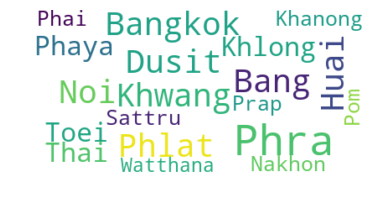

In [164]:
cluster3_df = bangkok_merged.loc[bangkok_merged['Cluster Labels'] == 3, bangkok_merged.columns[[0] + list(range(5, bangkok_merged.shape[1]))]]

print(cluster3_df[['District(Khet)']])

wordcloud3 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(cluster3_df['District(Khet)']))
plt.figure()
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis("off")
plt.show()


## CLUSTER 3 ( Affluent Traveller Cluster)
This cluster is predominantly "The HOTEL" cluster which is the 1st most common venue followed by coffee shops and shopping malls.Looks like someone staying in this cluster could leisurely stroll into air conditioned shopping malls.
Take shelter into a plush coffee shop or have desserts.

## Conclusion

The unsupervised machine learning clustering algorithm could identify the clusters in the city of Bangkok. The identified clusters and their main characteristics are -->

- Cluster 0 - The outskirts cluster

The identified cluster is far away from the city center. There are no hotels here. Thai restaurants and noodle houses cater to the local palette. There are many small depertment stores in this cluster.

- Cluster 1 - The Backpackers Cluster

This cluster is dotted with hostels and hotels also noodle houses, thai restaurants jostle for space with spas. It appears to be a cluster where one should visit atleast once even if they are not staying. Probably one of the central tourist destination. Due to the presence of hostels this could be ideal for young backpackers.

- Cluster 2 - The Resident Cluster

Lack of hotels/hostels hustle and bustle are the characteristics of this cluster. If you are an expat and plan to work in Bangkok you should considering renting a place in this cluster. Also, from the visualization map one can stay nearer to airport and away from city center here. When you dont want to cook the friendly neighbourhood noodle houses will welcome you.

- Cluster 3 - The Affluent Traveler Cluster

This cluster is predominantly "The HOTEL" cluster which is the 1st most common venue followed by coffee shops and shopping malls.Looks like someone staying in this cluster could leisurely stroll into air conditioned shopping malls and breaks from long shopping will be punctuated by shelters to plush coffee  or  dessert shops.
